In [1]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv("movies.csv")

#Splits genres in aparte rijen (één genre per rij)
df = df.assign(genres=df["genres"].str.split(",")).explode("genres")

# Bereken gemiddelde rating en som van votes per genre
genre_stats = df.groupby("genres").agg(
    averageRating=("averageRating", "mean"),
    numMovies=("title", "count"),  # Aantal films per genre
).reset_index()

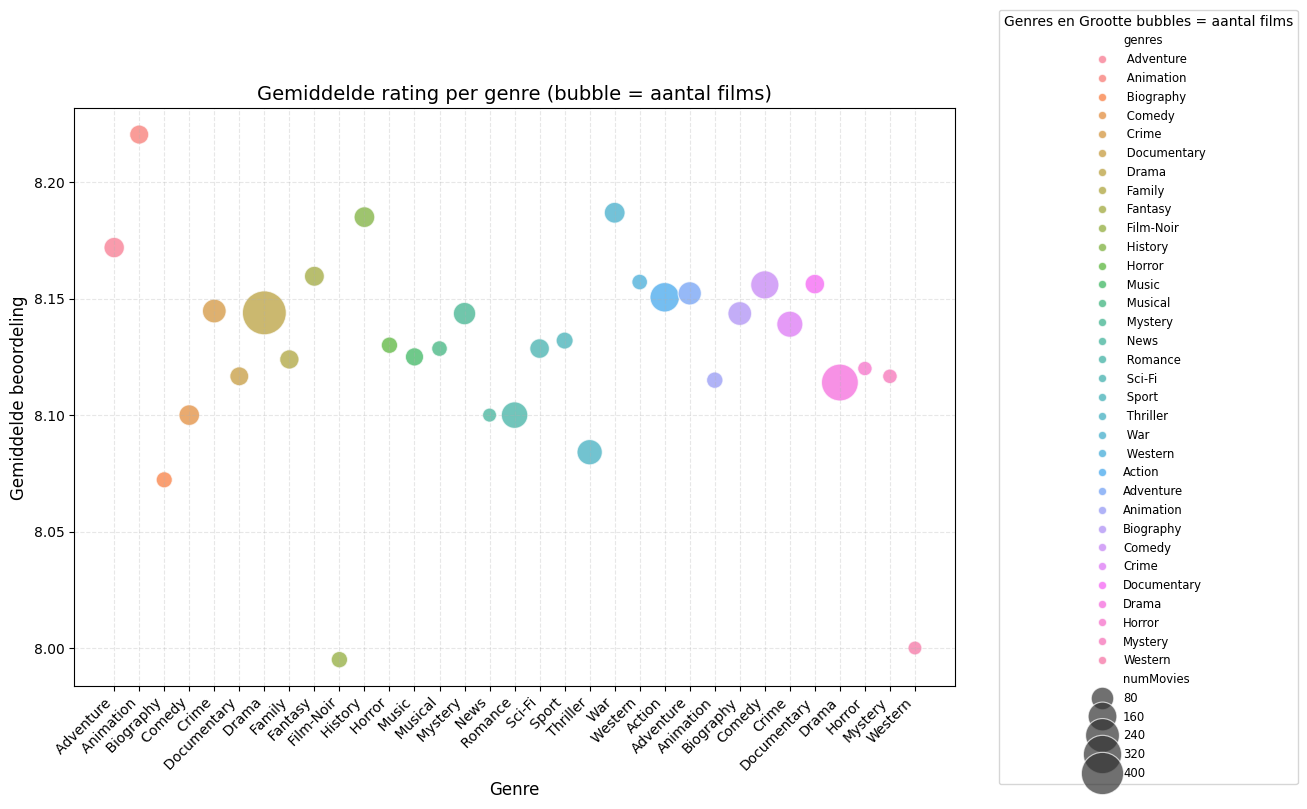

In [3]:
plt.figure(figsize=(12, 8))

# Bubble chart met seaborn
sns.scatterplot(
    data=genre_stats,
    x="genres",
    y="averageRating",
    size="numMovies",      # Bubble-grootte = aantal films
    sizes=(100, 1000),     # Min/max bubble-grootte (pas aan)
    hue="genres",          # Kleur op genre (optioneel)
    alpha=0.7,             # Doorzichtigheid
    legend="brief",         # Toon legenda    
)

plt.title("Gemiddelde rating per genre (bubble = aantal films)", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Gemiddelde beoordeling", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Draai genre-labels voor leesbaarheid


plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.grid(axis="x", linestyle="--", alpha=0.3)


plt.legend(
    bbox_to_anchor=(1.05, 0.5),   # Rechts van het plot
    loc='center left',
    borderaxespad=0,
    title="Genres en " \
    "Grootte bubbles = aantal films",
    fontsize='small',
    title_fontsize='medium'
)


plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Zorg dat er ruimte is voor de legenda
plt.show()